In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, auc, roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
print("First 5 lines:")
print(df.head(5))

print("Describe:")
print(df.describe())

print("Info:")
print(df.info())

(284807, 31)
First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

Class pie chart:


Text(0, 0.5, '')

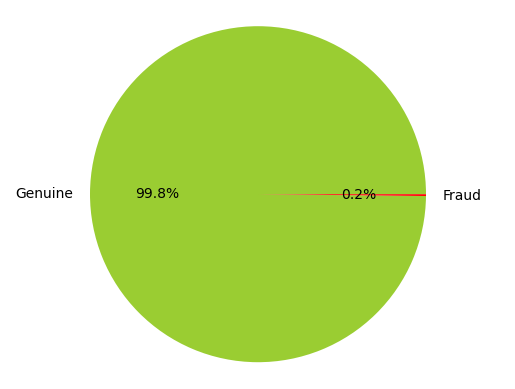

In [3]:
print("Class pie chart:")
fig, ax = plt.subplots(1,1)
ax.pie(df.Class.value_counts(), autopct='%1.1f%%', labels=['Genuine', 'Fraud'], colors=['yellowgreen', 'red'])
plt.axis('equal')
plt.ylabel('')

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

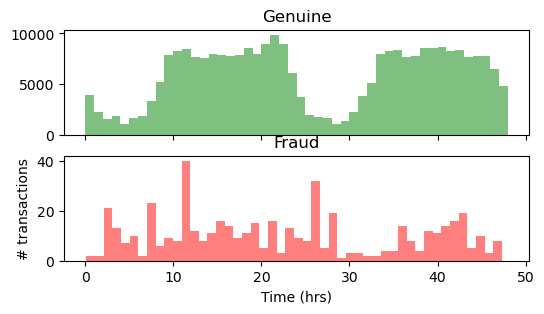

In [4]:
print('Time variable')
df['Time_Hr'] = df['Time']/3600
print(df['Time_Hr'].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6, 3))
ax1.hist(df.Time_Hr[df.Class==0], bins=48, color='g', alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1], bins=48, color='r', alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

In [5]:
df = df.drop(['Time'], axis=1)

Text(0, 0.5, '# transactions')

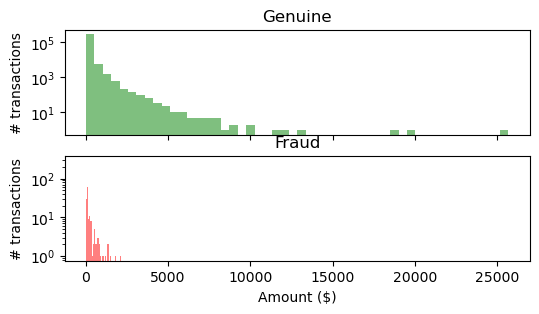

In [6]:
fig, (ax3, ax4) = plt.subplots(2, 1, figsize = (6, 3), sharex = True)
ax3.hist(df.Amount[df.Class==0], bins=50, color = 'g', alpha = 0.5)
ax3.set_yscale('log')
ax3.set_title('Genuine')
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1], bins = 50, color = 'r', alpha = 0.5)
ax4.set_yscale('log')
ax4.set_title('Fraud')
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [7]:
from sklearn.preprocessing import StandardScaler
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Amount'], axis = 1)

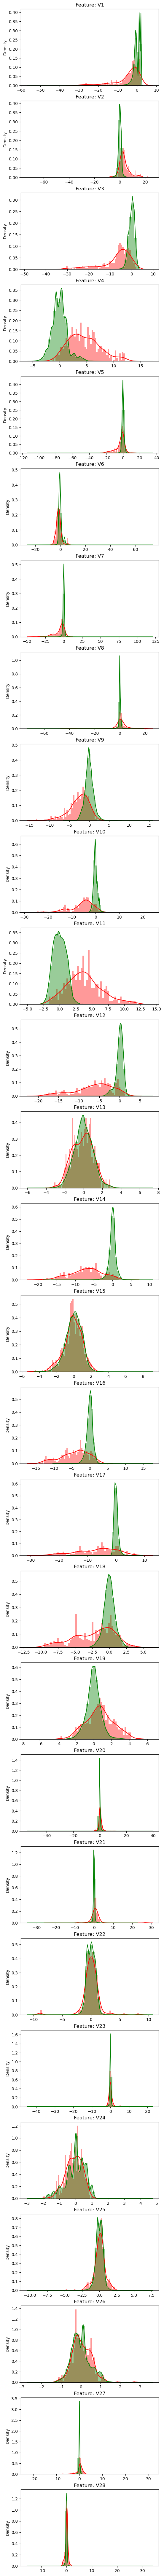

In [13]:
import seaborn as sns
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6, 28*4))

for i, col in enumerate(df[df.iloc[:, 0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class==1], bins = 50, color = 'r')
    sns.distplot(df[col][df.Class==0], bins = 50, color = 'g')
    ax5.set_xlabel('')
    ax5.set_title('Feature: ' + str(col))
plt.show()

In [14]:
def split_data(df, drop_list):
    df = df.drop(drop_list, axis=1)
    print(df.columns)

    from sklearn.model_selection import train_test_split

    y = df['Class'].values
    X = df.drop(['Class'], axis=1).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    print('train-set size: ', len(y_train),
        '\ntest-set size: ', len(y_test))
    print('fraud cases in test-set: ', sum(y_test))
    return X_train, X_test, y_train, y_test

In [20]:
def get_predictions(clf, X_train, y_train, X_test):
    clf = clf
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train, train_pred))
    return y_pred, y_pred_prob

In [16]:
def print_scores(y_test, y_pred, y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test, y_pred))
    print('recall score: ', recall_score(y_test, y_pred))
    print('precision score: ', precision_score(y_test, y_pred))
    print('f1 score: ', accuracy_score(y_test, y_pred))
    print('accuracy score: ', accuracy_score(y_test, y_pred))
    print('ROC AUC: {}'.format(roc_auc_score(y_test, y_pred_prob[:, 1])))

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [21]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[222480   4971]
 [    69    325]]
test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  0.058781869688385266
f1 score:  0.9764053228468101
accuracy score:  0.9764053228468101
ROC AUC: 0.963247971529636


In [22]:
drop_list = ['V28', 'V27', 'V26', 'V25', 'V24', 'V23', 'V22', 'V20', 'V15', 'V13', 'V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test, y_pred, y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223967   3484]
 [    61    333]]
test-set confusion matrix:
 [[55935   929]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08472906403940887
f1 score:  0.9834802148800955
accuracy score:  0.9834802148800955
ROC AUC: 0.9622034097825962
